In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Upload the Excel file
from google.colab import files
data = files.upload()

Saving Credit_Prediction.csv to Credit_Prediction.csv


In [ ]:
# Read the CSV file
df = pd.read_csv("indigineous data.csv")

In [ ]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Indigenous       989 non-null    object
 1   Education        989 non-null    object
 2   Weekly Hours     989 non-null    int64 
 3   Weekly Wage      989 non-null    int64 
 4   Total Employees  989 non-null    int64 
 5   Gender           989 non-null    object
 6   Age Group        989 non-null    object
dtypes: int64(3), object(4)
memory usage: 54.2+ KB


In [ ]:
df

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group
0,Yes,High School,35,500,50,Male,25-34
1,Yes,Bachelor's,40,800,60,Female,35-44
2,No,Master's,45,1200,45,Male,45-54
3,No,High School,30,400,55,Female,25-34
4,Yes,Associate's,38,700,70,Male,55-64
...,...,...,...,...,...,...,...
984,Yes,Associate's,39,2286,500,Male,55-162
985,No,Doctorate,27,1776,242,Female,35-142
986,No,High School,43,2147,388,Male,25-132
987,No,Bachelor's,31,1426,128,Female,45-152


In [ ]:
#Replacing the age group with correct range
import re

age_group_regex = {
    r'25-\d+': '25-34',
    r'35-\d+': '35-44',
    r'45-\d+': '45-54',
    r'55-\d+': '55+',
}

# Function to apply the mapping
def correct_age_group(age_group):
    for pattern, replacement in age_group_regex.items():
        if re.match(pattern, age_group):
            return replacement
    return age_group

In [ ]:
# Apply the correction to the Age Group column
df['Age Group'] = df['Age Group'].apply(correct_age_group)
# Check the corrected data
print(df['Age Group'].unique())

['25-34' '35-44' '45-54' '55+']


In [ ]:
df

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group
0,Yes,High School,35,500,50,Male,25-34
1,Yes,Bachelor's,40,800,60,Female,35-44
2,No,Master's,45,1200,45,Male,45-54
3,No,High School,30,400,55,Female,25-34
4,Yes,Associate's,38,700,70,Male,55+
...,...,...,...,...,...,...,...
984,Yes,Associate's,39,2286,500,Male,55+
985,No,Doctorate,27,1776,242,Female,35-44
986,No,High School,43,2147,388,Male,25-34
987,No,Bachelor's,31,1426,128,Female,45-54


In [ ]:
#As Indigenous is categorical data we need to convert it to numerical data for clustering
#Therefore performing one hot encoding for 'Indigenous'

one_hot_encoded_data = pd.get_dummies(df.Indigenous)
one_hot_encoded_data = one_hot_encoded_data.astype(int)
one_hot_encoded_data.head()  #Source: https://www.geeksforgeeks.org/ml-one-hot-encoding/

,No,Yes
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df.head()

,Indigenous,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,No,Yes
0,Yes,High School,35,500,50,Male,25-34,0,1
1,Yes,Bachelor's,40,800,60,Female,35-44,0,1
2,No,Master's,45,1200,45,Male,45-54,1,0
3,No,High School,30,400,55,Female,25-34,1,0
4,Yes,Associate's,38,700,70,Male,55+,0,1


In [ ]:
df = df.drop(['Indigenous', 'No'], axis = 1)
df.head()

,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,Yes
0,High School,35,500,50,Male,25-34,1
1,Bachelor's,40,800,60,Female,35-44,1
2,Master's,45,1200,45,Male,45-54,0
3,High School,30,400,55,Female,25-34,0
4,Associate's,38,700,70,Male,55+,1


In [ ]:
df = df.rename(columns={'Yes': 'Indigenous'})
df.head() #Now we can see that the Indigenous column is converted to the numerical data using one hot encoding

,Education,Weekly Hours,Weekly Wage,Total Employees,Gender,Age Group,Indigenous
0,High School,35,500,50,Male,25-34,1
1,Bachelor's,40,800,60,Female,35-44,1
2,Master's,45,1200,45,Male,45-54,0
3,High School,30,400,55,Female,25-34,0
4,Associate's,38,700,70,Male,55+,1


In [ ]:
#Similarly, gender Column is also converted to the numnerical data using one-hot encoding
one_hot_encoded_data = pd.get_dummies(df.Gender)
one_hot_encoded_data = one_hot_encoded_data.astype(int)
df = pd.concat([df, one_hot_encoded_data], axis = 1)
df = df.drop(['Gender', 'Female'], axis = 1)
df.head()


,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,High School,35,500,50,25-34,1,1
1,Bachelor's,40,800,60,35-44,1,0
2,Master's,45,1200,45,45-54,0,1
3,High School,30,400,55,25-34,0,0
4,Associate's,38,700,70,55+,1,1


In [ ]:
#Now we can see that Education and Age group are ordinal categorical variables
#Therefore, it is appropriate to use ordinal encoding Source: https://medium.com/@brandon93.w/converting-categorical-data-into-numerical-form-a-practical-guide-for-data-science-99fdf42d0e10

education_mapping = {
    'High School': 0,
    'Associate\'s': 1,
    'Bachelor\'s': 2,
    'Master\'s': 3,
    'Doctorate': 4
}

age_group_mapping = {
    '25-34': 0,
    '35-44': 1,
    '45-54': 2,
    '55+': 3
}

df['Education'] = df['Education'].map(education_mapping)
df['Age Group'] = df['Age Group'].map(age_group_mapping)

df.head()


,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0,35,500,50,0,1,1
1,2,40,800,60,1,1,0
2,3,45,1200,45,2,0,1
3,0,30,400,55,0,0,0
4,1,38,700,70,3,1,1


In [ ]:
#data exploration
# Initial scatter plot of the data
import plotly.express as px
fig = px.scatter_matrix(df,width=1600, height=1600)
fig.show()

In [ ]:
df.describe()

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.498483,37.686552,1374.232558,259.861476,1.000000,0.332659,0.500506
std,1.432435,7.461835,661.296231,136.834174,1.001012,0.471404,0.500253
min,0.000000,25.000000,250.000000,21.000000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,802.000000,146.000000,0.000000,0.000000,0.000000
50%,1.000000,38.000000,1371.000000,259.000000,1.000000,0.000000,1.000000
75%,3.000000,44.000000,1953.000000,370.000000,2.000000,1.000000,1.000000
max,4.000000,50.000000,2500.000000,500.000000,3.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: >, <Axes: >]],
      dtype=object)

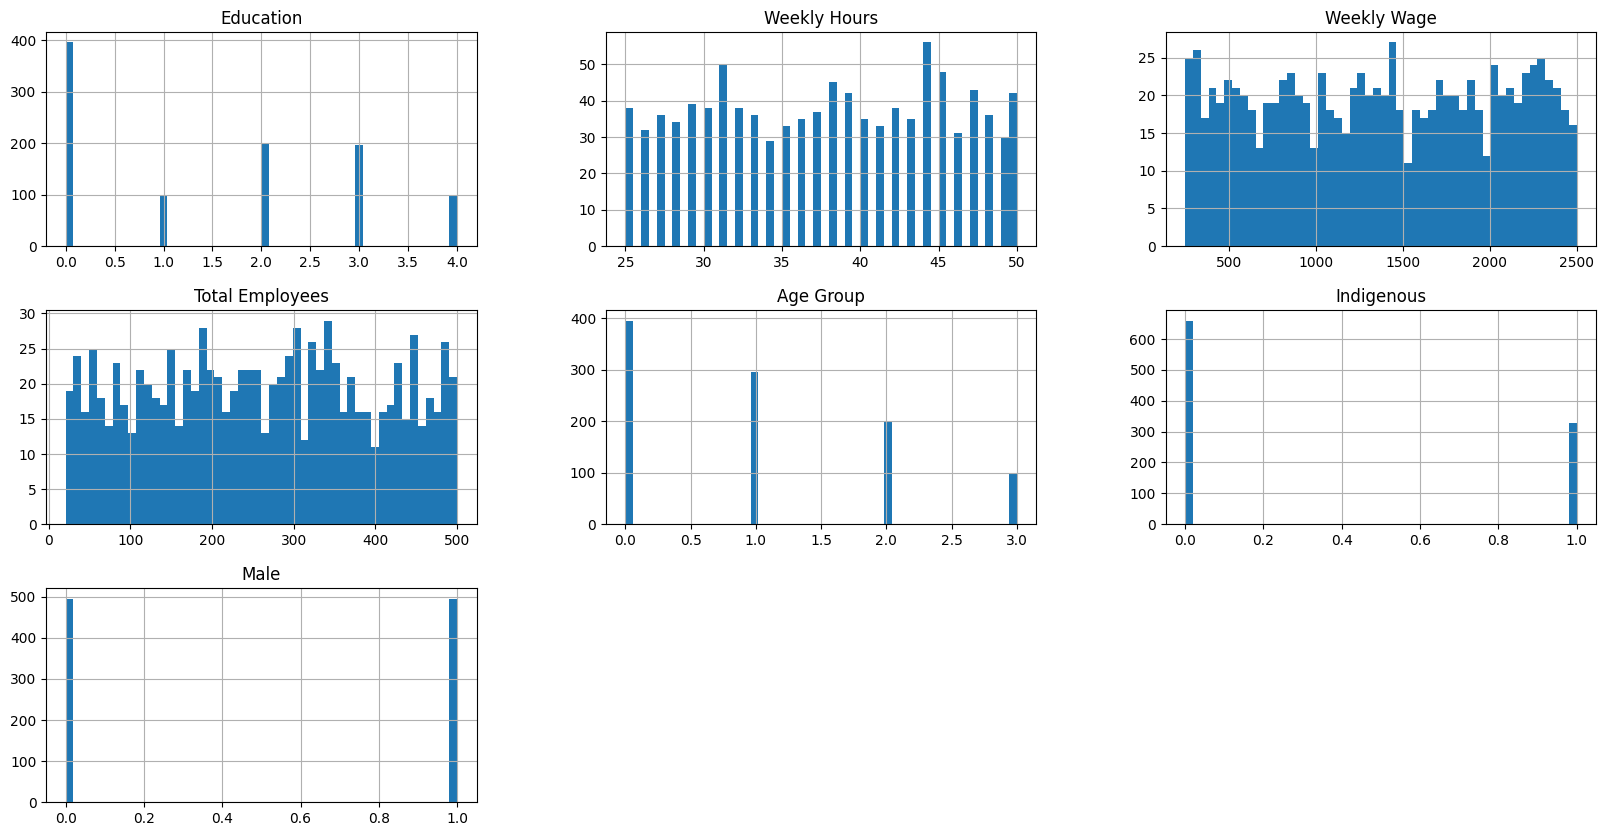

In [ ]:
df.hist(bins = 50, figsize=(20,10))

In [ ]:
#Feature Scaling

scaler = MinMaxScaler()
df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous',
    'Male']] = scaler.fit_transform(df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees',
                                        'Age Group', 'Indigenous', 'Male']])
df.head()

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: >, <Axes: >]],
      dtype=object)

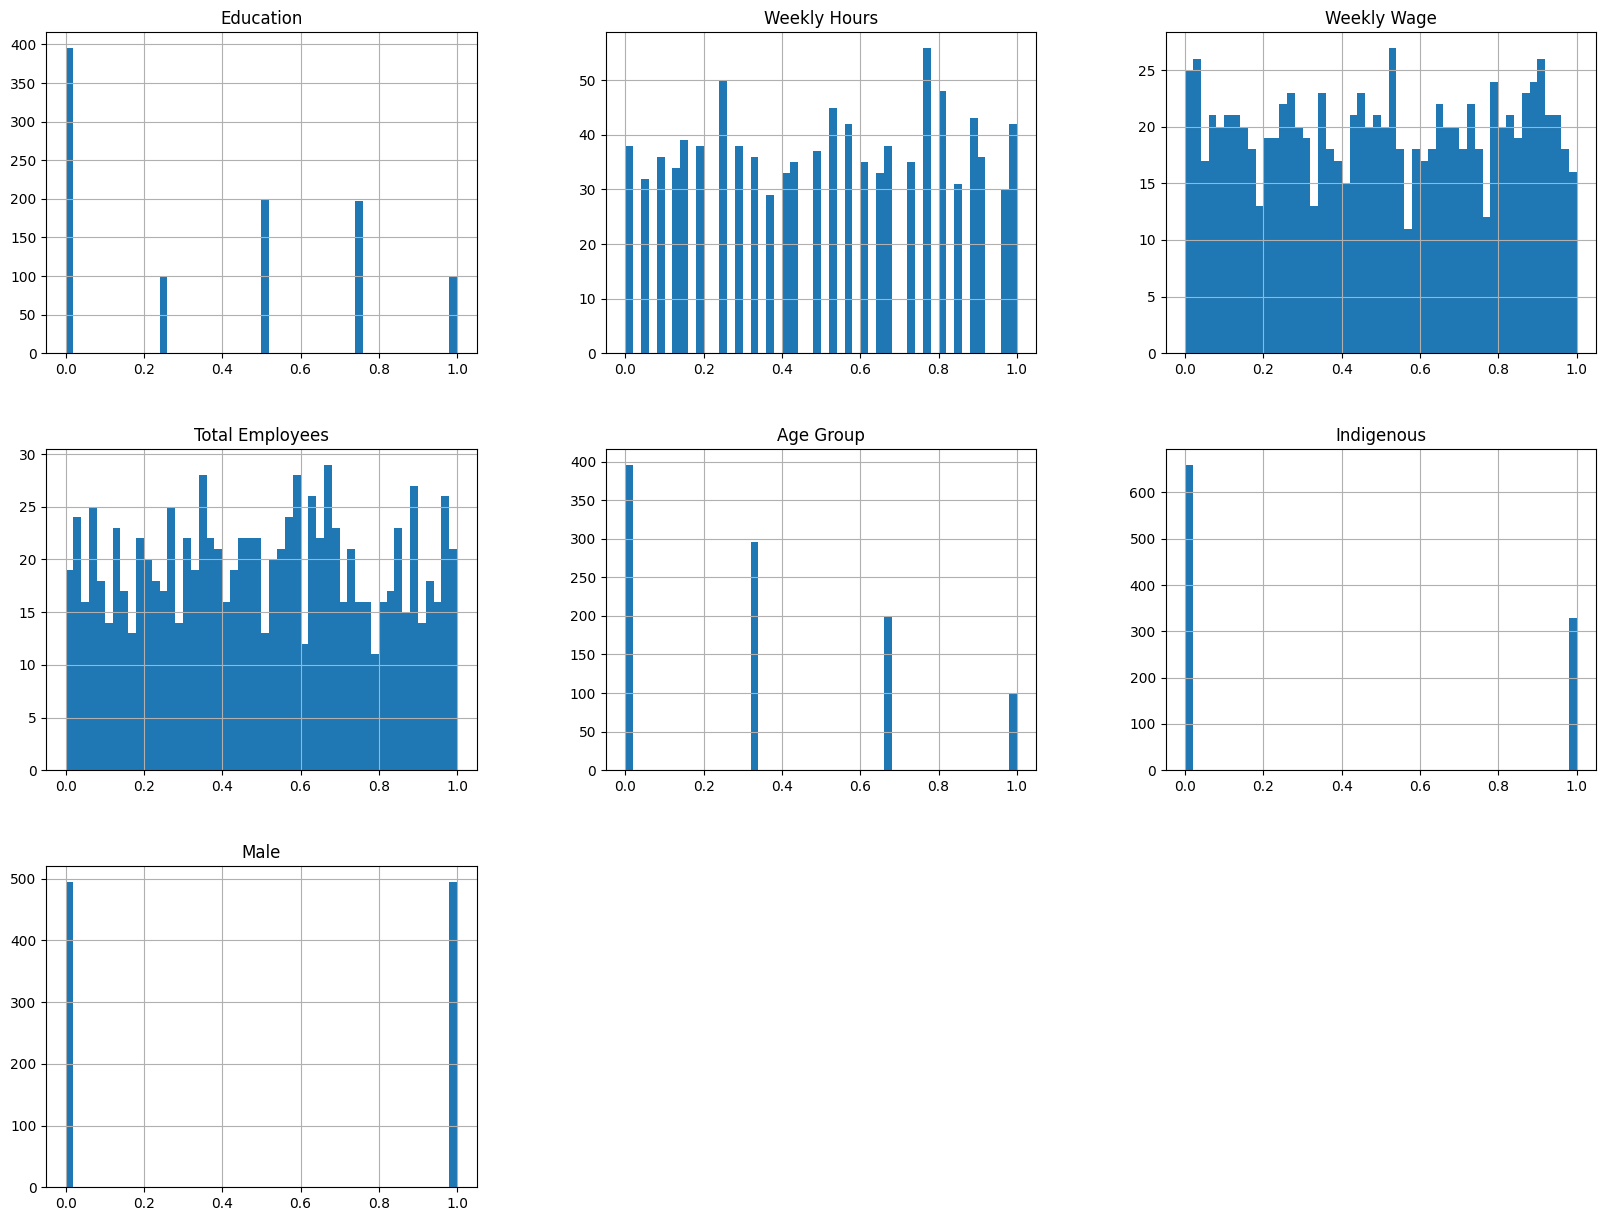

In [ ]:
#data exploration
df.hist(bins = 50, figsize=(20,15))

In [ ]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data taking all columns as features
kmean = KMeans(n_clusters=3)

y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                              'Weekly Wage', 'Total Employees',
                             'Age Group', 'Indigenous', 'Male']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,1
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,2
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,2
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,1
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,1
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,2
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,2


In [ ]:
# Separating the data points based on clusters
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


df1
#df4

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
12,0.75,0.32,0.368444,0.549061,0.666667,0.0,1.0,0
20,0.00,0.88,0.701778,0.215031,0.000000,0.0,1.0,0
22,0.75,0.00,0.726667,0.801670,0.666667,0.0,1.0,0
24,0.25,0.80,0.582667,0.588727,1.000000,0.0,1.0,0
...,...,...,...,...,...,...,...,...
972,0.75,0.72,0.827111,0.139875,0.666667,0.0,1.0,0
974,0.25,0.76,0.738222,0.853862,1.000000,0.0,1.0,0
980,0.00,0.56,0.613333,0.231733,0.000000,0.0,1.0,0
982,0.75,0.08,0.653778,0.768267,0.666667,0.0,1.0,0


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

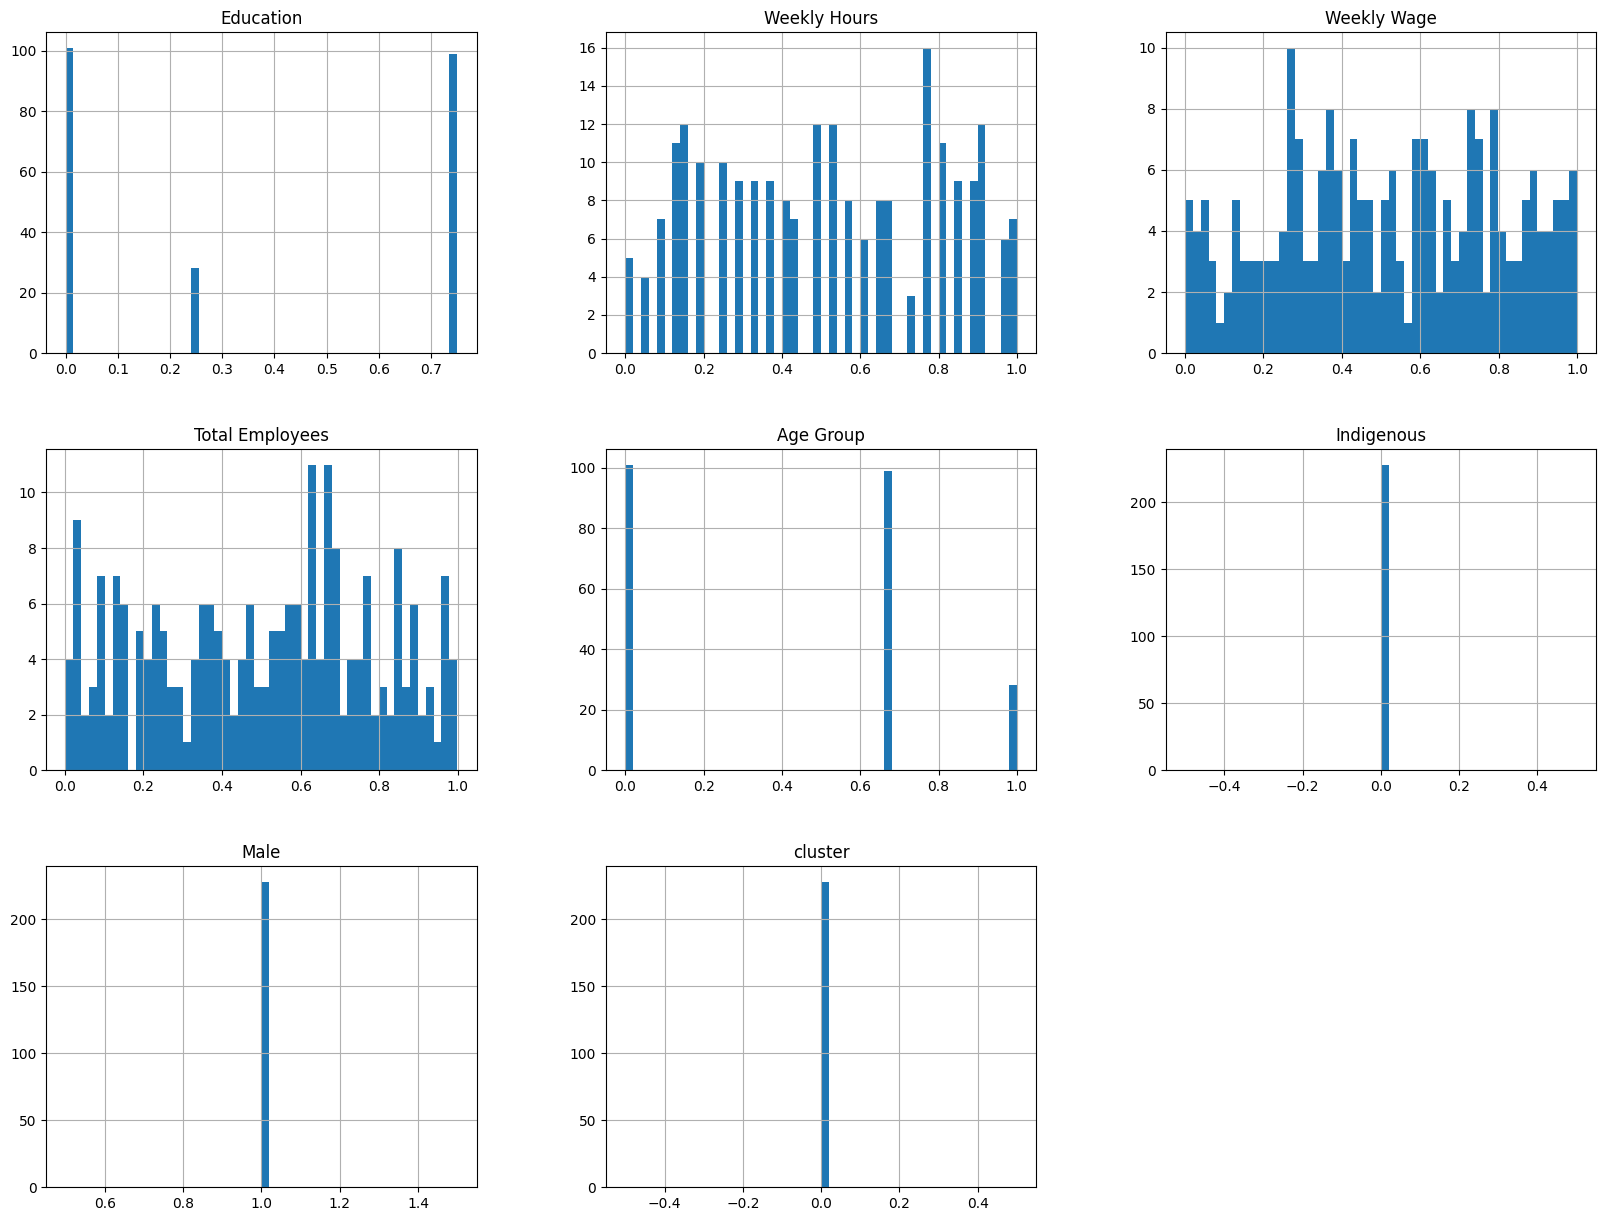

In [ ]:
df1.hist(bins = 50, figsize=(20,15))

In [ ]:
# Elbow curve
sse = []

# Iterate through a range of K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Education', 'Weekly Hours',
                             'Weekly Wage', 'Total Employees',
                              'Age Group', 'Indigenous', 'Male']])



    sse.append(kmeans.inertia_)  # inertia_ gives the SSE

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[957.497320577834,
 637.6315790332363,
 501.39483878081006,
 444.6446282772216,
 389.068414010902,
 335.111541159173,
 282.69596113473386,
 260.06784222492513,
 244.47884849883656,
 230.13988199791277]

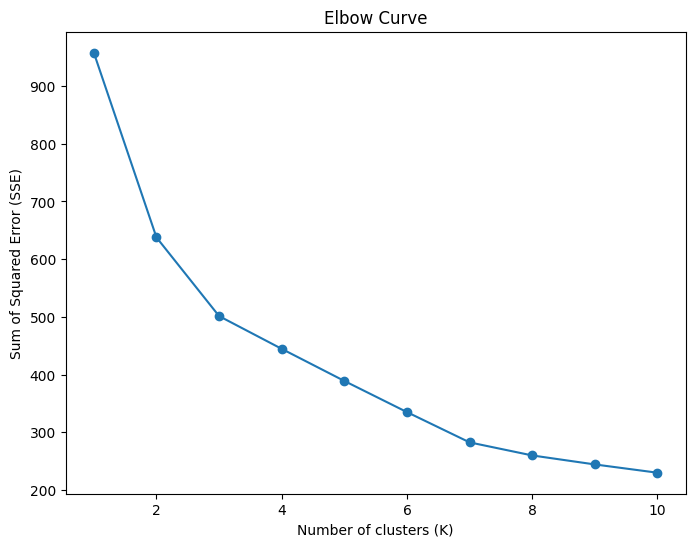

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [ ]:
# Calculate percentage decrease in SSE

for i in range(1, len(sse)):
    percentage_decrease = (sse[i-1] - sse[i]) / sse[i-1] * 100
    print(f"K={i+1}: SSE decrease = {percentage_decrease:.2f}%")

K=2: SSE decrease = 33.41%
K=3: SSE decrease = 21.37%
K=4: SSE decrease = 11.32%
K=5: SSE decrease = 12.50%
K=6: SSE decrease = 13.87%
K=7: SSE decrease = 15.64%
K=8: SSE decrease = 8.00%
K=9: SSE decrease = 5.99%
K=10: SSE decrease = 5.87%


In [ ]:
#performance evaluation
from sklearn.metrics import silhouette_score

df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_demographics, y_pred)
silhouette_avg

0.5499764011305948

In [ ]:
print(df['cluster'].value_counts())

cluster
2    494
1    267
0    228
Name: count, dtype: int64


In [ ]:
#import plotly.express as px
#fig = px.scatter_matrix(df,
#width=1200, height=1600)
#fig.show()

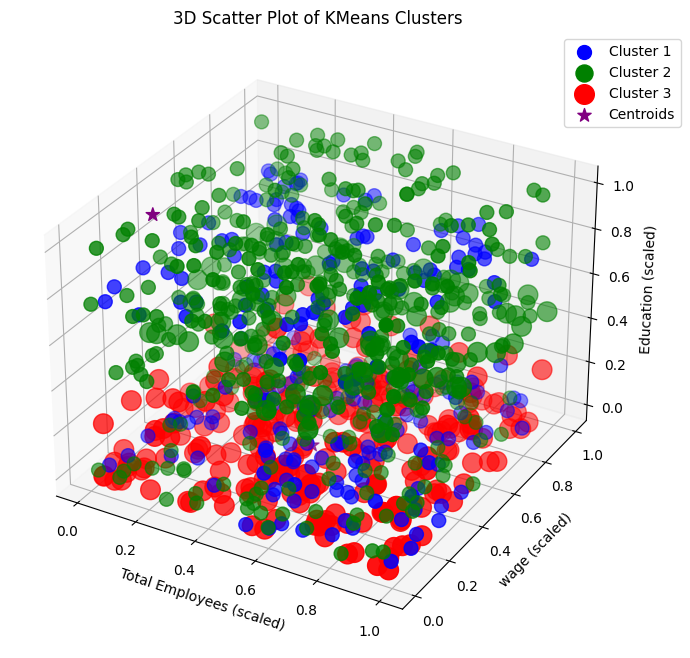

In [ ]:
# Plotting the clustered data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(40, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clustered data

# Not able to visualize all the 7 features
ax.scatter(df1['Total Employees'], df1['Weekly Wage'], df1['Education'],  s = (df1['Indigenous']+1)*100, color='blue', label='Cluster 1')
ax.scatter(df2['Total Employees'], df2['Weekly Wage'], df2['Education'],  s = (df2['Indigenous']+1)*100, color='green', label='Cluster 2')
ax.scatter(df3['Total Employees'], df3['Weekly Wage'], df3['Education'],  s = (df3['Indigenous']+1)*100, color='red', label='Cluster 3')

# Plotting the centroids
ax.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], kmean.cluster_centers_[:, 2],
           color='purple', s=100, marker='*',label='Centroids')

# Adding labels and legend
ax.set_xlabel('Total Employees (scaled)')
ax.set_ylabel('wage (scaled)')
ax.set_zlabel('Education (scaled)')
ax.set_title('3D Scatter Plot of KMeans Clusters')
ax.legend(loc='best', bbox_to_anchor=(1.1, 1))

plt.show()



In [ ]:
kmean.cluster_centers_[:, 2]

array([0.52097076, 0.47300042, 0.50423122])

In [ ]:
df_clusters = df
df_clusters

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,1
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,2
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,2
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,1
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,1
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,2
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,2


In [ ]:
df_to_unscale = df.drop('cluster', axis=1)
clusters = df['cluster']

df_to_unscale[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']] = scaler.inverse_transform(df_to_unscale[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']])
df_to_unscale['cluster'] = clusters
df_to_unscale

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.0,35.0,500.0,50.0,0.0,1.0,1.0,1
1,2.0,40.0,800.0,60.0,1.0,1.0,0.0,2
2,3.0,45.0,1200.0,45.0,2.0,0.0,1.0,0
3,0.0,30.0,400.0,55.0,0.0,0.0,0.0,2
4,1.0,38.0,700.0,70.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...
984,1.0,39.0,2286.0,500.0,3.0,1.0,1.0,1
985,4.0,27.0,1776.0,242.0,1.0,0.0,0.0,2
986,0.0,43.0,2147.0,388.0,0.0,0.0,1.0,0
987,2.0,31.0,1426.0,128.0,2.0,0.0,0.0,2


array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'Weekly Hours'}>,
        <Axes: title={'center': 'Weekly Wage'}>],
       [<Axes: title={'center': 'Total Employees'}>,
        <Axes: title={'center': 'Age Group'}>,
        <Axes: title={'center': 'Indigenous'}>],
       [<Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'cluster'}>, <Axes: >]], dtype=object)

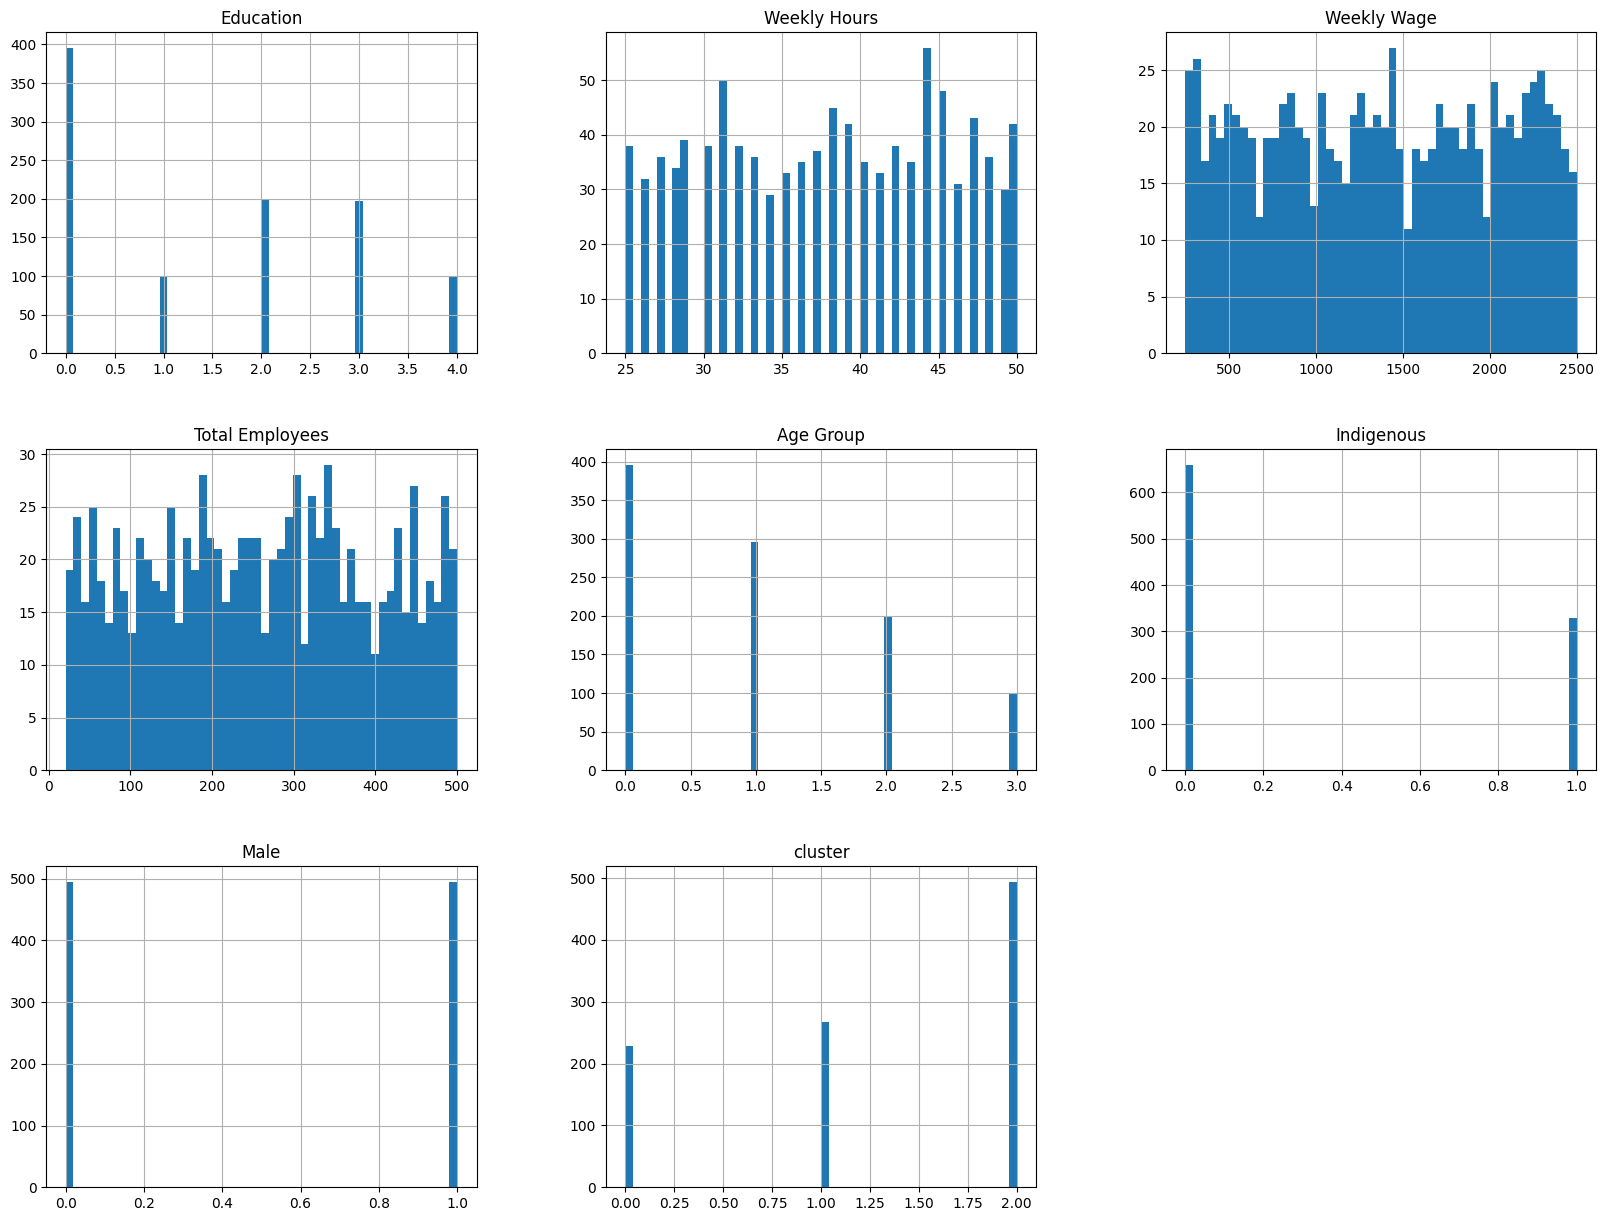

In [ ]:
df_to_unscale.hist(bins = 50, figsize=(20,15))

In [ ]:
polar=df_clusters.groupby("cluster").mean().reset_index()
#polar
# Reindex columns to swap "Male" and "Education"
#polar = polar.reindex(columns=['cluster', 'Male', 'Age Group', 'Indigenous', 'Education'])
polar


,cluster,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0,0.356360,0.510175,0.520971,0.501410,0.412281,0.000000,1.0
1,1,0.066479,0.513858,0.473000,0.497932,0.265918,1.000000,1.0
2,2,0.549595,0.502753,0.504231,0.497798,0.333333,0.125506,0.0


In [ ]:
polar_unScaled=df_to_unscale.groupby("cluster").mean().reset_index()
polar_unScaled

,cluster,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0,1.425439,37.754386,1422.184211,261.175439,1.236842,0.000000,1.0
1,1,0.265918,37.846442,1314.250936,259.509363,0.797753,1.000000,1.0
2,2,2.198381,37.568826,1384.520243,259.445344,1.000000,0.125506,0.0


In [ ]:
import plotly.express as px
polar=pd.melt(polar,id_vars=['cluster'])
#custom_colors = ['#1f77b4', '#d62728', '#ffff44', '#2ca02c']
fig4 = px.line_polar(polar, r="value",
                     theta="variable",
                     color="cluster",
                     line_close=True,
                     height=600,width=1000)

fig4.show()

In [ ]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data considering only demographic features
kmean = KMeans(n_clusters=3)

#y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                             # 'Weekly Wage', 'Total Employees',
                             # 'Age Group', 'Indigenous', 'Male']])

y_pred = kmean.fit_predict(df[['Education','Age Group', 'Indigenous', 'Male']])  #Considering only demographic features
y_pred


#df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0,

In [ ]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,2
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,1
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,0
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,1
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,2
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,2
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,1
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,0
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,1


In [ ]:
#performance evaluation
from sklearn.metrics import silhouette_score

df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_demographics, y_pred)
silhouette_avg

0.5499764011305948

In [ ]:
print(df['cluster'].value_counts())

cluster
1    494
2    267
0    228
Name: count, dtype: int64


In [ ]:
df_clusters = df[['Education','Age Group', 'Indigenous', 'Male', 'cluster']]
df_clusters

,Education,Age Group,Indigenous,Male,cluster
0,0.00,0.000000,1.0,1.0,2
1,0.50,0.333333,1.0,0.0,1
2,0.75,0.666667,0.0,1.0,0
3,0.00,0.000000,0.0,0.0,1
4,0.25,1.000000,1.0,1.0,2
...,...,...,...,...,...
984,0.25,1.000000,1.0,1.0,2
985,1.00,0.333333,0.0,0.0,1
986,0.00,0.000000,0.0,1.0,0
987,0.50,0.666667,0.0,0.0,1


In [ ]:
polar=df_clusters.groupby("cluster").mean().reset_index()
#polar
# Reindex columns to swap "Male" and "Education"
#polar = polar.reindex(columns=['cluster', 'Male', 'Age Group', 'Indigenous', 'Education'])
polar

,cluster,Education,Age Group,Indigenous,Male
0,0,0.356360,0.412281,0.000000,1.0
1,1,0.549595,0.333333,0.125506,0.0
2,2,0.066479,0.265918,1.000000,1.0


In [ ]:
import plotly.express as px
polar=pd.melt(polar,id_vars=['cluster'])
#custom_colors = ['#1f77b4', '#d62728', '#ffff44', '#2ca02c']
fig4 = px.line_polar(polar, r="value",
                     theta="variable",
                     color="cluster",
                     line_close=True,
                     height=600,width=1000)

fig4.show()

In [ ]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data considering only demographic features
kmean = KMeans(n_clusters=7)

#y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                             # 'Weekly Wage', 'Total Employees',
                             # 'Age Group', 'Indigenous', 'Male']])

y_pred = kmean.fit_predict(df[['Education','Age Group', 'Indigenous', 'Male']])  #Considering only demographic features
y_pred


#df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 6, 2, 5, 3, 0, 1, 0, 1, 0, 1, 6, 2, 5, 3, 0, 1, 0, 1, 0, 4, 6,
       2, 5, 2, 0, 1, 0, 4, 0, 4, 6, 2, 5, 3, 0, 1, 0, 4, 0, 1, 6, 2, 5,
       3, 0, 4, 0, 4, 0, 1, 0, 2, 5, 2, 0, 4, 0, 1, 0, 1, 0, 2, 5, 3, 0,
       1, 0, 1, 0, 1, 6, 2, 5, 3, 0, 1, 0, 1, 0, 1, 6, 2, 5, 3, 0, 4, 0,
       1, 0, 4, 6, 2, 5, 2, 0, 1, 0, 1, 0, 1, 6, 2, 5, 3, 0, 1, 0, 1, 0,
       1, 6, 2, 5, 2, 0, 4, 0, 1, 0, 1, 0, 2, 5, 2, 0, 1, 0, 1, 0, 1, 6,
       2, 5, 3, 0, 4, 0, 1, 0, 1, 0, 2, 5, 2, 0, 1, 0, 1, 0, 4, 0, 2, 5,
       2, 0, 4, 0, 1, 0, 4, 0, 2, 5, 3, 0, 1, 0, 1, 0, 1, 0, 2, 5, 3, 0,
       1, 0, 1, 0, 1, 0, 2, 5, 3, 0, 1, 0, 1, 0, 1, 6, 2, 5, 3, 0, 4, 0,
       1, 0, 4, 6, 2, 5, 3, 0, 1, 0, 1, 0, 4, 6, 2, 5, 3, 0, 1, 0, 4, 0,
       1, 0, 2, 5, 3, 0, 1, 0, 1, 0, 1, 6, 2, 5, 2, 0, 1, 0, 4, 0, 1, 6,
       2, 5, 3, 0, 1, 0, 1, 0, 1, 6, 2, 5, 2, 0, 1, 0, 1, 0, 1, 6, 2, 5,
       2, 0, 1, 0, 1, 0, 1, 0, 2, 5, 3, 0, 1, 0, 1, 0, 4, 0, 2, 5, 2, 0,
       1, 0, 1, 0, 1, 6, 2, 5, 2, 0, 1, 0, 1, 0, 4,

In [ ]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,1
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,6
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,2
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,5
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,3
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,3
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,0
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,4
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,0


In [ ]:
#performance evaluation
from sklearn.metrics import silhouette_score

df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_demographics, y_pred)
silhouette_avg

0.8558044844771276

In [ ]:
print(df['cluster'].value_counts())

cluster
0    333
1    196
2    127
4    101
5     99
3     71
6     62
Name: count, dtype: int64


In [ ]:
df_clusters = df[['Education','Age Group', 'Indigenous', 'Male', 'cluster']]
df_clusters

,Education,Age Group,Indigenous,Male,cluster
0,0.00,0.000000,1.0,1.0,1
1,0.50,0.333333,1.0,0.0,6
2,0.75,0.666667,0.0,1.0,2
3,0.00,0.000000,0.0,0.0,5
4,0.25,1.000000,1.0,1.0,3
...,...,...,...,...,...
984,0.25,1.000000,1.0,1.0,3
985,1.00,0.333333,0.0,0.0,0
986,0.00,0.000000,0.0,1.0,4
987,0.50,0.666667,0.0,0.0,0


In [ ]:
polar=df_clusters.groupby("cluster").mean().reset_index()
#polar
# Reindex columns to swap "Male" and "Education"
#polar = polar.reindex(columns=['cluster', 'Male', 'Age Group', 'Indigenous', 'Education'])
polar

,cluster,Education,Age Group,Indigenous,Male
0,0,0.722222,0.432432,0.0,0.0
1,1,0.000000,0.000000,1.0,1.0
2,2,0.639764,0.740157,0.0,1.0
3,3,0.250000,1.000000,1.0,1.0
4,4,0.000000,0.000000,0.0,1.0
5,5,0.000000,0.000000,0.0,0.0
6,6,0.500000,0.333333,1.0,0.0


In [ ]:
import plotly.express as px
polar=pd.melt(polar,id_vars=['cluster'])
#custom_colors = ['#1f77b4', '#d62728', '#ffff44', '#2ca02c']
fig4 = px.line_polar(polar, r="value",
                     theta="variable",
                     color="cluster",
                     line_close=True,
                     height=600,width=1000)

fig4.show()

In [ ]:
#Model Implementation ---> K means Clustering

# Applying KMeans algorithm to the scaled data considering only demographic features
kmean = KMeans(n_clusters=4)

#y_pred = kmean.fit_predict(df[['Education', 'Weekly Hours',
                             # 'Weekly Wage', 'Total Employees',
                             # 'Age Group', 'Indigenous', 'Male']])

y_pred = kmean.fit_predict(df[['Education','Age Group', 'Indigenous', 'Male']])  #Considering only demographic features
y_pred


#df[['Education', 'Weekly Hours', 'Weekly Wage', 'Total Employees', 'Age Group', 'Indigenous', 'Male']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 3, 0,
       2, 3, 2, 0, 1, 0, 3, 0, 3, 0, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 3,
       1, 0, 3, 0, 3, 0, 1, 0, 2, 3, 2, 0, 3, 0, 1, 0, 1, 0, 2, 3, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 3, 0,
       1, 0, 3, 0, 2, 3, 2, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1, 0,
       1, 0, 2, 3, 2, 0, 3, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 3, 1, 0, 3, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 3, 0, 2, 3,
       2, 0, 3, 0, 1, 0, 3, 0, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0,
       1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 3, 0,
       1, 0, 3, 0, 2, 3, 1, 0, 1, 0, 1, 0, 3, 0, 2, 3, 1, 0, 1, 0, 3, 0,
       1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0, 3, 0, 1, 0,
       2, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 1, 0, 2, 3,
       2, 0, 1, 0, 1, 0, 1, 0, 2, 3, 1, 0, 1, 0, 1, 0, 3, 0, 2, 3, 2, 0,
       1, 0, 1, 0, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 3,

In [ ]:
# Assigning the cluster labels to the dataframe
df['cluster'] = y_pred
df

,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male,cluster
0,0.00,0.40,0.111111,0.060543,0.000000,1.0,1.0,1
1,0.50,0.60,0.244444,0.081420,0.333333,1.0,0.0,0
2,0.75,0.80,0.422222,0.050104,0.666667,0.0,1.0,2
3,0.00,0.20,0.066667,0.070981,0.000000,0.0,0.0,3
4,0.25,0.52,0.200000,0.102296,1.000000,1.0,1.0,1
...,...,...,...,...,...,...,...,...
984,0.25,0.56,0.904889,1.000000,1.000000,1.0,1.0,1
985,1.00,0.08,0.678222,0.461378,0.333333,0.0,0.0,0
986,0.00,0.72,0.843111,0.766180,0.000000,0.0,1.0,3
987,0.50,0.24,0.522667,0.223382,0.666667,0.0,0.0,0


In [ ]:
# Elbow curve
sse = []

# Iterate through a range of K values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['Education','Age Group', 'Indigenous', 'Male']])



    sse.append(kmeans.inertia_)  # inertia_ gives the SSE

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

[703.5078361981782,
 383.68536069194005,
 247.7347758779515,
 190.77733185357243,
 135.41451587303476,
 84.11742217118697,
 30.042175049064866,
 13.952582507882266,
 6.070692744102715,
 1.6787037037037034]

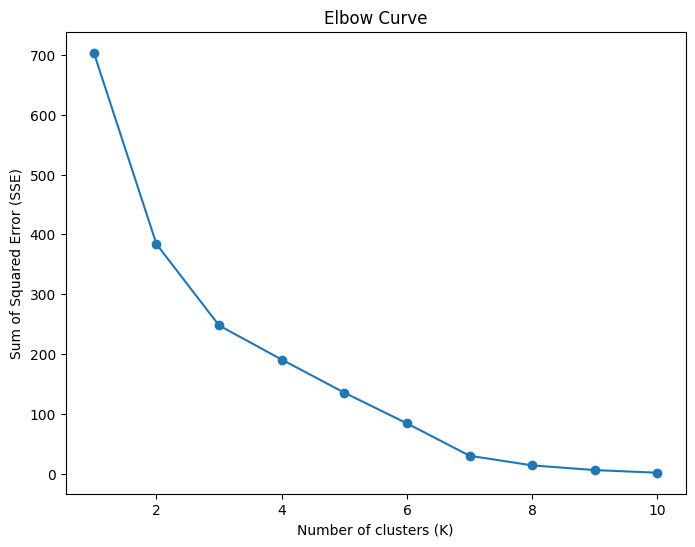

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [ ]:
# Calculate percentage decrease in SSE

for i in range(1, len(sse)):
    percentage_decrease = (sse[i-1] - sse[i]) / sse[i-1] * 100
    print(f"K={i+1}: SSE decrease = {percentage_decrease:.2f}%")

K=2: SSE decrease = 45.46%
K=3: SSE decrease = 35.43%
K=4: SSE decrease = 22.99%
K=5: SSE decrease = 29.02%
K=6: SSE decrease = 37.88%
K=7: SSE decrease = 64.29%
K=8: SSE decrease = 53.56%
K=9: SSE decrease = 56.49%
K=10: SSE decrease = 72.35%


In [ ]:
#performance evaluation
from sklearn.metrics import silhouette_score

df_demographics = df[['Education','Age Group', 'Indigenous', 'Male']]

silhouette_avg = silhouette_score(df_demographics, y_pred)
silhouette_avg

0.5982230065128993

In [ ]:
print(df['cluster'].value_counts())

cluster
0    395
1    267
3    200
2    127
Name: count, dtype: int64


In [ ]:
kmean.cluster_centers_[:, 2]

array([1.56962025e-01, 1.00000000e+00, 2.77555756e-16, 3.33066907e-16])

In [ ]:
df_clusters = df[['Education','Age Group', 'Indigenous', 'Male', 'cluster']]
df_clusters

,Education,Age Group,Indigenous,Male,cluster
0,0.00,0.000000,1.0,1.0,1
1,0.50,0.333333,1.0,0.0,0
2,0.75,0.666667,0.0,1.0,2
3,0.00,0.000000,0.0,0.0,3
4,0.25,1.000000,1.0,1.0,1
...,...,...,...,...,...
984,0.25,1.000000,1.0,1.0,1
985,1.00,0.333333,0.0,0.0,0
986,0.00,0.000000,0.0,1.0,3
987,0.50,0.666667,0.0,0.0,0


In [ ]:
polar=df_clusters.groupby("cluster").mean().reset_index()
#polar
# Reindex columns to swap "Male" and "Education"
polar = polar.reindex(columns=['cluster', 'Male', 'Age Group', 'Indigenous', 'Education'])
polar

,cluster,Male,Age Group,Indigenous,Education
0,0,0.000,0.416878,0.156962,0.687342
1,1,1.000,0.265918,1.000000,0.066479
2,2,1.000,0.740157,0.000000,0.639764
3,3,0.505,0.000000,0.000000,0.000000


In [ ]:
polar_unScaled=df_to_unscale.groupby("cluster").mean().reset_index()
polar_unScaled

,cluster,Education,Weekly Hours,Weekly Wage,Total Employees,Age Group,Indigenous,Male
0,0,1.425439,37.754386,1422.184211,261.175439,1.236842,0.000000,1.0
1,1,0.265918,37.846442,1314.250936,259.509363,0.797753,1.000000,1.0
2,2,2.198381,37.568826,1384.520243,259.445344,1.000000,0.125506,0.0


In [ ]:
import plotly.express as px
polar=pd.melt(polar,id_vars=['cluster'])
custom_colors = ['#1f77b4', '#d62728', '#ffff44', '#2ca02c']
fig4 = px.line_polar(polar, r="value",
                     theta="variable",
                     color="cluster",
                     line_close=True,
                     height=600,width=1000, color_discrete_sequence=custom_colors)

fig4.show()  #The cluster groups appeared to be different from that of compiled earlier while making documentation. This may because of the initialization of the centroid i,e different initial positions results in different final centroid points
             #Additionally, this difference in resultant cluster could be because of random seed used for centroid initialization which wa not fixed, the results varied each time running the algorithm.